9.0
3.0
7.0
5.0


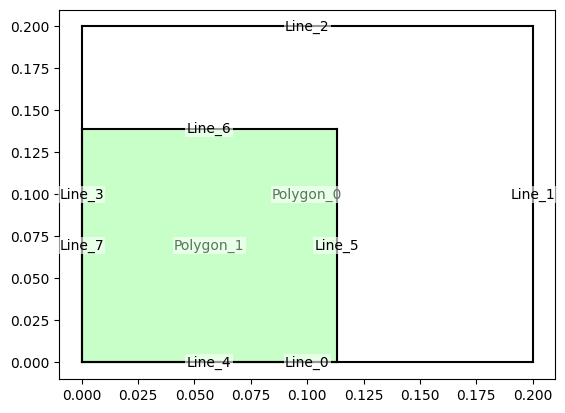

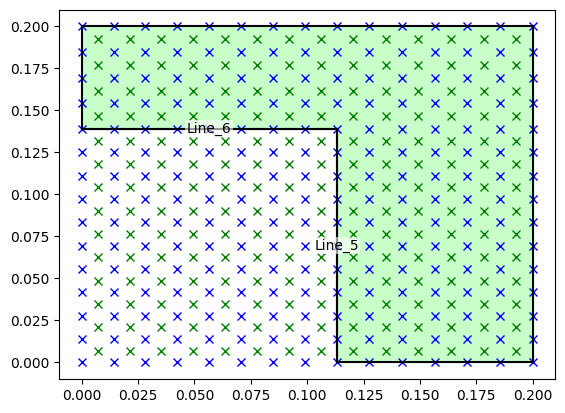

In [1]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import fluid_fvm.mp_coupling as mp
import fluid_fvm.solver as sol
import numpy as np
a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.113,0),geo.Vector(0.113,0.139), geo.Vector(0,0.139)])])
a.assemble()
fig, ax = plt.subplots()

a.plot(ax, labels=True)

mesh_c_full = ms.RectangularSnappingConfig(15,15)
mat = pr.Material("test", mu = 1, rho = 156, gamma = 1,color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, gamma = 1, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)
comp.setMesh(mesh_c_full)


fig, ax = plt.subplots()

mesh_c_full.plotMesh(ax)
for line in mesh_c_full.snapLines:
    line.plot(ax)
valid_polygon = geo.Polygon([geo.Vector(0.113,0), geo.Vector(0.2,0), geo.Vector(0.2,0.2), geo.Vector(0,0.2), geo.Vector(0,0.139),geo.Vector(0.113,0.139)])
valid_polygon.plot(ax)

Node:0  Neighbour: 0 Nwighbour idx: []
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 14
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 15
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Node:2  Neighbour: 2 Nwighbour idx: 16
Self[[1.]]
Neighbour:[[0.]]
Const:0
---------------
Nod

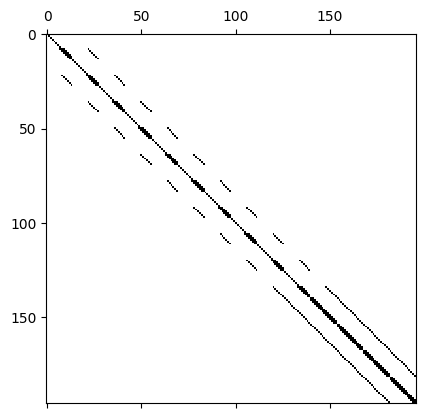

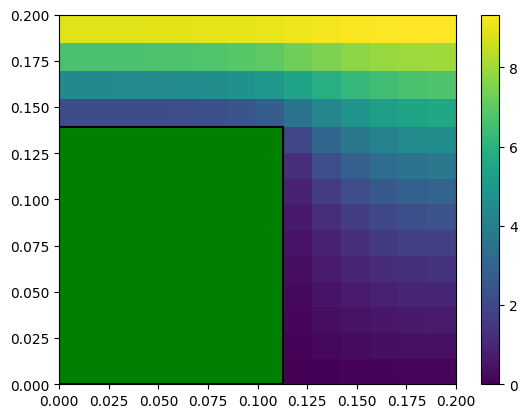

In [2]:
bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 10),
          "Line_3" : ph.Boundary("Neumann", 0),
          "Line_6" : ph.Boundary("Neumann", 0),
          "Line_5" : ph.Boundary("Neumann", 0),}



c = ph.HeatTransfer(a, bcdict)
phys = mp.PartialSolution(c, valid_polygon, 1)

comp.setPhysics(phys)
disc = dc.LinearFullDiscretizerMultiphysics(comp,1)
disc.discretize()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)


res = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res[mesh_c_full.math2geoVolume(i)] = res_math[i]

mesh_y = np.zeros(mesh_c_full.volumeMesh.shape)

mesh_x = np.zeros(mesh_c_full.volumeMesh.shape)

for iy, ix in np.ndindex(mesh_c_full.volumeMesh.shape):
    thispoint = mesh_c_full.volumeMesh[iy,ix]
    mesh_x[iy,ix] = thispoint.x
    mesh_y[iy,ix] = thispoint.y
    
fig, ax = plt.subplots()
pl = plt.pcolormesh(mesh_x, mesh_y, res)
fig.colorbar(pl,)
geo.Polygon([geo.Vector(0,0),geo.Vector(0.113,0),geo.Vector(0.113,0.139), geo.Vector(0,0.139)]).plot(ax, color="green")


22.0
10.0
18.0
14.0
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[0. 0. 1.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0. 0. 1.]]


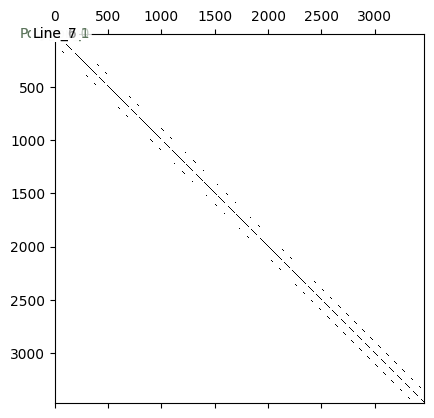

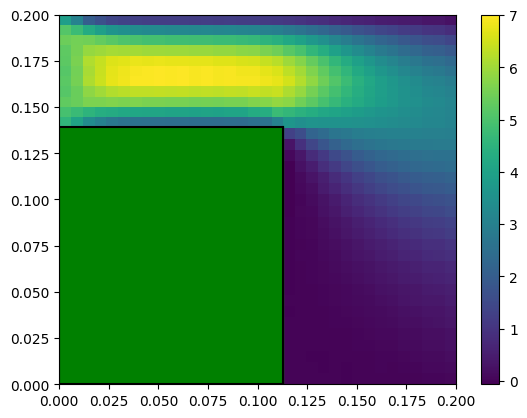

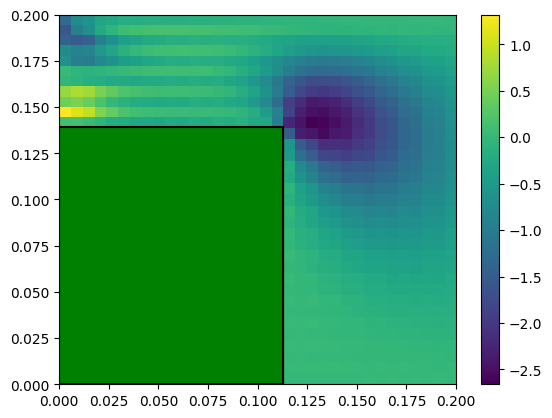

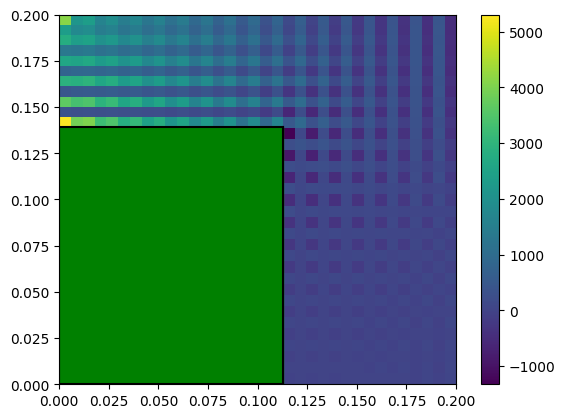

In [3]:
a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.113,0),geo.Vector(0.113,0.139), geo.Vector(0,0.139)])])
a.assemble()
fig, ax = plt.subplots()

a.plot(ax, labels=True)

mesh_c_full = ms.RectangularSnappingConfig(35,35)
mat = pr.Material("test", mu = 1, rho = 156, gamma = 1,color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, gamma = 1, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)
comp.setMesh(mesh_c_full)

valid_polygon = geo.Polygon([geo.Vector(0.113,0), geo.Vector(0.2,0), geo.Vector(0.2,0.2), geo.Vector(0,0.2), geo.Vector(0,0.139),geo.Vector(0.113,0.139)])
valid_polygon.plot(ax)
bcdict = {"Line_0" : ph.Boundary("Dirichlet", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_2" : ph.Boundary("Dirichlet", 10),
          "Line_3" : ph.Boundary("Neumann", 0),
          "Line_6" : ph.Boundary("Neumann", 0),
          "Line_5" : ph.Boundary("Neumann", 0),}
bcdict = {"Line_0" : ph.Boundary("No_slip", 0),
          "Line_1" : ph.Boundary("Pressure_outlet", 2),
          "Line_2" : ph.Boundary("No_slip", 0),
          "Line_3" : ph.Boundary("Velocity_inlet", 5),
          "Line_5" : ph.Boundary("No_slip", 0),
          "Line_6" : ph.Boundary("No_slip", 0),}


c = ph.StokesFlow(a, bcdict)
phys = mp.PartialSolution(c, valid_polygon, 3)

comp.setPhysics(phys)
disc = dc.LinearFullDiscretizerMultiphysics(comp,3)
disc.discretize()
plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)




res = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res[mesh_c_full.math2geoVolume(i)] = res_math[i]

mesh_y = np.zeros(mesh_c_full.volumeMesh.shape)

mesh_x = np.zeros(mesh_c_full.volumeMesh.shape)

for iy, ix in np.ndindex(mesh_c_full.volumeMesh.shape):
    thispoint = mesh_c_full.volumeMesh[iy,ix]
    mesh_x[iy,ix] = thispoint.x
    mesh_y[iy,ix] = thispoint.y


cover_poly = geo.Polygon([geo.Vector(0,0),geo.Vector(0.113,0),geo.Vector(0.113,0.139), geo.Vector(0,0.139)])

res_u = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_u[mesh_c_full.math2geoVolume(i)] = res_math[i*3]

res_v = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_v[mesh_c_full.math2geoVolume(i)] = res_math[i*3+1]


res_p = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_p[mesh_c_full.math2geoVolume(i)] = res_math[i*3+2]

fig, ax = plt.subplots()

pl = plt.pcolormesh(mesh_x, mesh_y,res_u)
fig.colorbar(pl,)
cover_poly.plot(ax, color="green")
fig, ax = plt.subplots()

pl = plt.pcolormesh(mesh_x, mesh_y,res_v)
fig.colorbar(pl,)
cover_poly.plot(ax, color="green")
#print(disc.Bmrx)

fig, ax = plt.subplots()

pl = plt.pcolormesh(mesh_x, mesh_y,res_p)
fig.colorbar(pl,)
#print(res_u)
cover_poly.plot(ax, color="green")

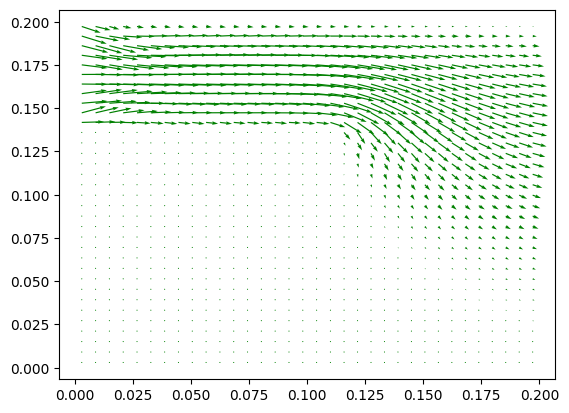

In [4]:

  
# Directional vectors 
u = res_u
v = res_v
  
# Plotting Vector Field with QUIVER 
plt.quiver(mesh_x, mesh_y, u, v, color='g') 

TypeError: DualSequentialSolver.__init__() missing 5 required positional arguments: 'sequence', 'discretizer1', 'solver1', 'discretizer2', and 'solver2'